<a href="https://colab.research.google.com/github/bedirhantute/object_detection/blob/main/object_detection_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8 Object Detection

## Enviroment

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv8/1_object_detecion/

/content/drive/MyDrive/YOLOv8/1_object_detecion


In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 29.8/201.2 GB disk)


## Test / Prediction

In [ ]:
!yolo detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'  # predict with pre-trained official model

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/drive/MyDrive/YOLOv8/1_object_detecion/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 276.0ms
Speed: 20.6ms preprocess, 276.0ms inference, 2942.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


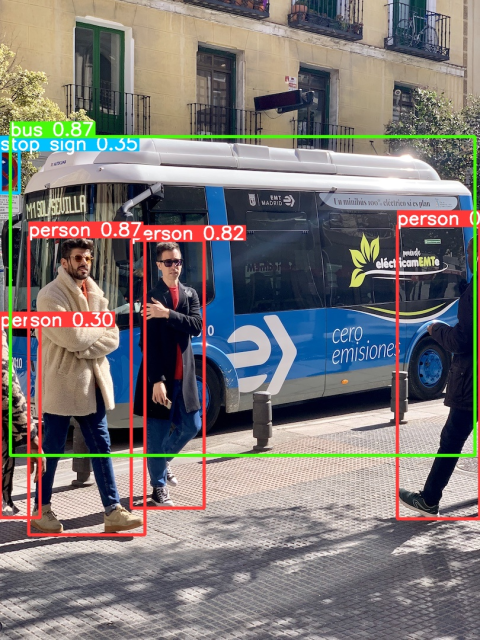

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img = cv2.imread("runs/detect/predict/bus.jpg")
img = imutils.resize(img, width=480)
cv2_imshow(img)


0: 640x480 4 persons, 1 bus, 1 stop sign, 152.7ms
Speed: 5.6ms preprocess, 152.7ms inference, 1795.1ms postprocess per image at shape (1, 3, 640, 480)


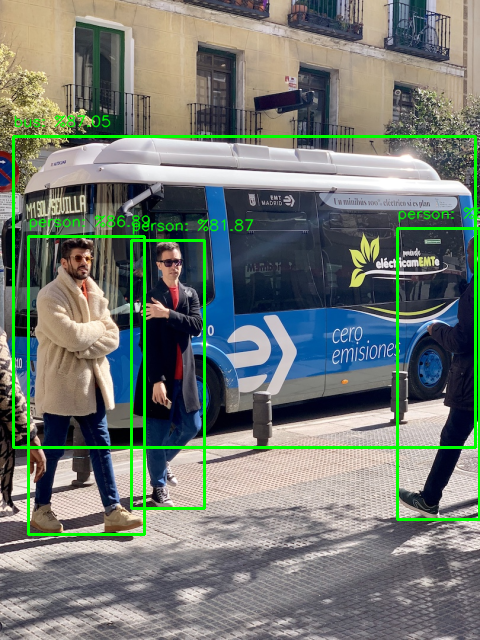

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX
img_path = "bus.jpg"
model_path = "yolov8n.pt"

model = YOLO(model_path)
img = cv2.imread(img_path)
img = imutils.resize(img, width=480)

results = model(img)[0]

# print(results)
threshold = 0.4
for result in results.boxes.data.tolist():
  #print(result)
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > threshold:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)                            # img / coordinates / color / thickness

    class_name = results.names[class_id]
    score = score * 100
    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)       # img / text/ coordinates / font / scale / color / thickness / line

cv2_imshow(img)





## Training

In [ ]:
!unzip data/traffic_dataset.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/traffic_dataset/labels/train/2088.txt  
  inflating: ./data/traffic_dataset/labels/train/2089.txt  
  inflating: ./data/traffic_dataset/labels/train/209.txt  
  inflating: ./data/traffic_dataset/labels/train/2091.txt  
  inflating: ./data/traffic_dataset/labels/train/2092.txt  
  inflating: ./data/traffic_dataset/labels/train/2094.txt  
  inflating: ./data/traffic_dataset/labels/train/2095.txt  
  inflating: ./data/traffic_dataset/labels/train/2096.txt  
  inflating: ./data/traffic_dataset/labels/train/2098.txt  
  inflating: ./data/traffic_dataset/labels/train/2099.txt  
  inflating: ./data/traffic_dataset/labels/train/21.txt  
  inflating: ./data/traffic_dataset/labels/train/2101.txt  
  inflating: ./data/traffic_dataset/labels/train/2102.txt  
  inflating: ./data/traffic_dataset/labels/train/2103.txt  
  inflating: ./data/traffic_dataset/labels/train/2104.txt  
  inflating: ./data/traffic_dataset/labels/train/2105.tx

In [ ]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=25 imgsz=640 workers=8 batch=8 device=0 name=vehicle_type

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=vehicle_type, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [ ]:
# if the training is interrupted cuz of your connection or anything else
!yolo detect train model=runs/detect/vehicle_type/weights/last.pt resume=True

## Vehicle Type Detection / Prediction

In [ ]:
!yolo detect predict model=runs/detect/vehicle_type/weights/best.pt source=inference save=True

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/inference/102.jpg: 640x640 2 bicycles, 15 cars, 5 persons, 1 truck, 7.8ms
image 2/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/inference/1023.jpg: 640x640 1 bus, 14 cars, 3 persons, 1 truck, 8.0ms
image 3/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/inference/1024.jpg: 640x640 1 bus, 14 cars, 3 persons, 1 truck, 7.9ms
image 4/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/inference/1032.jpg: 640x640 1 bus, 12 cars, 5 persons, 1 truck, 7.8ms
image 5/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/inference/1038.jpg: 640x640 1 bus, 10 cars, 2 trucks, 7.7ms
image 6/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/inference/1053.jpg: 640x640 15 cars, 6 persons, 7.7ms
image 7/664 /content/drive/MyDrive/YOLOv8/1_object_detecion/in